In [20]:
import numpy as np
import matplotlib.pyplot as plt

import glob, os
from scipy.interpolate import interp1d
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
#Loading data
F = np.load('spectra.npy')
met = np.load('metadata.npy')
#Wavelength is between 4000 and 8000 and must plot 1000 points
wavs = np.linspace(4000, 8000, 1000)

In [25]:
#Fidning the shap of the spectra data, to see how many row and columns it has
print(f"The shape of the spectra data is: {F.shape}")


The shape of the spectra data is: (3000, 1000)


/tmp/ipython-input-3387260397.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


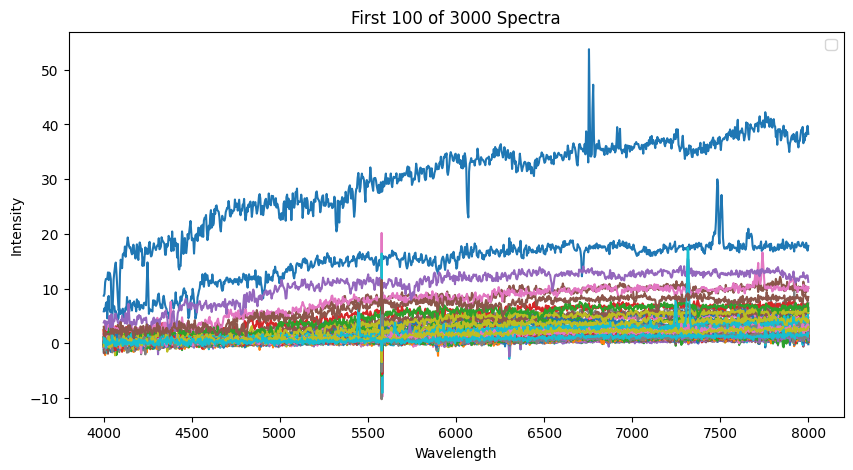

In [26]:
#plotting the spectra data to visualize it
plt.figure(figsize=(10,5))
for i in range(100):
    plt.plot(wavs, F[i])

plt.xlabel("Wavelength")
plt.ylabel("Intensity")
plt.title("First 100 of 3000 Spectra")
plt.legend()
plt.show()

In [6]:

# Create a PCA model that reduces the data to 2 components
pca = PCA(n_components=2)

# Fit and transform the data
F_pca = pca.fit_transform(F)

print("Original shape:", F.shape)
print("Reduced shape:", F_pca.shape)

# Variance explained by each component
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", sum(pca.explained_variance_ratio_))



Original shape: (3000, 1000)
Reduced shape: (3000, 2)
Explained variance ratio: [0.9609358  0.01265198]
Total variance captured: 0.9735877833692551


In [ ]:
F_pca

array([[-46.27771141,   4.67692738],
       [-15.94844753,  -0.30721017],
       [-36.56987358,   1.7061906 ],
       ...,
       [-19.02625234,  -1.62352274],
       [-23.70252333,  -3.22654798],
       [-17.22402152,   0.59308615]])

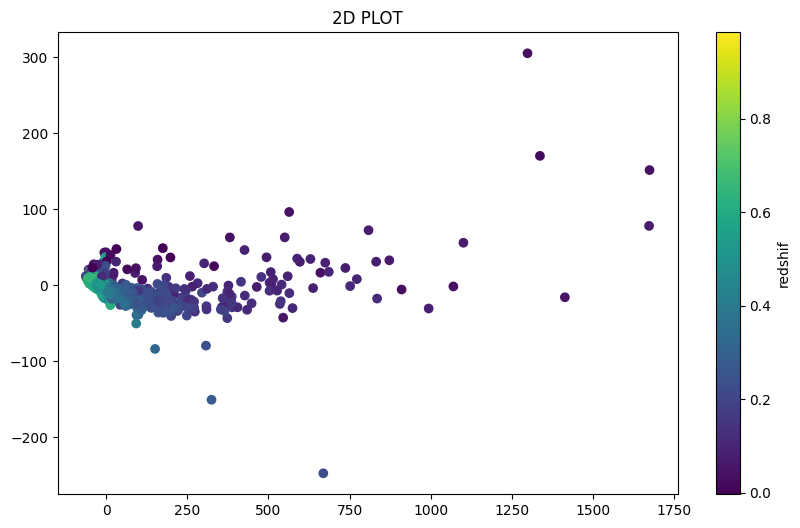

In [7]:
# Plot the reduced data
plt.figure(figsize=(10,6))
plt.scatter(F_pca[:,0], F_pca[:,1],c=met[:,0])
plt.colorbar( label='redshif')
plt.title("2D PLOT")
plt.show()

In [8]:
#splitting the training and test set
X_train, X_test,Y_train, Y_test= train_test_split(F_pca, met[:,0], test_size=0.33, random_state=42)

In [9]:
#initiatializing a regressor (random forest)
regr = RandomForestRegressor()

In [10]:
#fitting the regression function using the training set of data
regr.fit(X_train, Y_train)

RandomForestRegressor()

In [11]:
#Getting the prediction value of the redshift
y_predict = regr.predict(X_test)

In [21]:
#getting the mean square error and r2 score of the random forest algorithm
mean_squared_error(Y_test, y_predict)
r2 = r2_score(Y_test, y_predict)

print("Mean Squared Error:", mean_squared_error(Y_test, y_predict))
print("R2 Score:", r2)



Mean Squared Error: 0.0059660881790621935
R2 Score: 0.7197192827123906


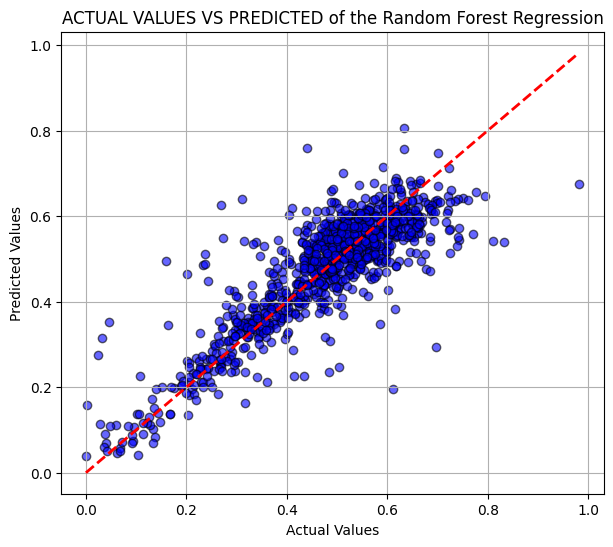

In [ ]:
#Plotting the

plt.figure(figsize=(7,6))
plt.scatter(Y_test, y_predict, color='blue', alpha=0.6, edgecolors='k')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("ACTUAL VALUES VS PREDICTED of the Random Forest Regression")
plt.grid(True)
plt.show()


In [13]:
#DOING OTHER REGRESSION MODELS, TO COMPARE WITH THE RANDOM FOREST
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


In [22]:
#DOING K-NEAREST NEIGHBOUR
# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Evaluate performance
mse_knn = mean_squared_error(Y_test, y_pred_knn)
print("KNN Regression:")
print(f"  MSE: {mse_knn:.6f}")

r2 = r2_score(Y_test, y_pred_knn)
print("R2 Score:", r2)





KNN Regression:
  MSE: 0.005478
R2 Score: 0.7426343768161163


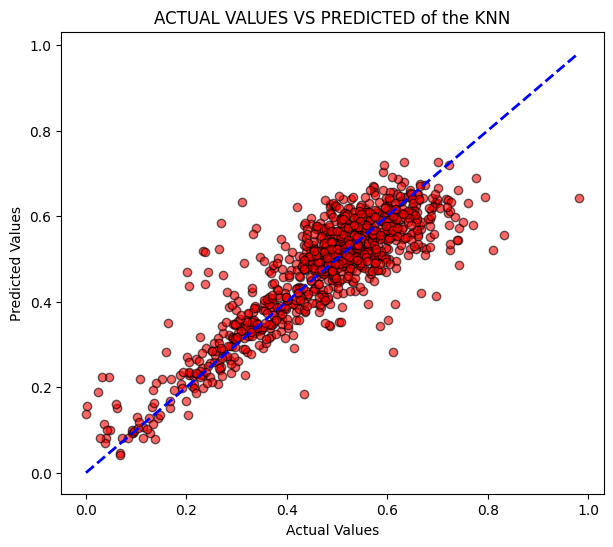

In [18]:
plt.figure(figsize=(7,6))
plt.scatter(Y_test, y_pred_knn, color='red', alpha=0.6, edgecolors='k')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'b--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("ACTUAL VALUES VS PREDICTED of the KNN")
plt.show()